In [2]:
import numpy as np
from keras import layers
from keras.layers import Input,Dense,Activation,ZeroPadding2D,BatchNormalization,Flatten,Conv2D
from keras.layers import AveragePooling2D,MaxPooling2D,Dropout,GlobalMaxPooling2D,GlobalAveragePooling2D
from keras.models import Model
from keras.preprocessing import image
from keras.utils import layer_utils
from keras.utils.data_utils import get_file
from keras.applications.imagenet_utils import preprocess_input
import pydot
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
from keras.utils import plot_model
import kt_utils

import keras.backend as K
K.set_image_data_format('channels_last')
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow

% matplotlib inline

In [6]:
X_train_orig,Y_train_orig,X_test_orig,Y_test_orig, classes = kt_utils.load_dataset()

X_train = X_train_orig / 255
X_test = X_test_orig / 255

Y_train = Y_train_orig.T
Y_test = Y_test_orig.T
print ("number of training examples = " + str(X_train.shape[0]))
print ("number of test examples = " + str(X_test.shape[0]))
print ("X_train shape: " + str(X_train.shape))
print ("Y_train shape: " + str(Y_train.shape))
print ("X_test shape: " + str(X_test.shape))
print ("Y_test shape: " + str(Y_test.shape))

number of training examples = 600
number of test examples = 150
X_train shape: (600, 64, 64, 3)
Y_train shape: (600, 1)
X_test shape: (150, 64, 64, 3)
Y_test shape: (150, 1)


In [4]:
def model(input_shape):
    '''
    模型大纲
    '''
    # 定义一个tensor的placeholder，维度为input_shape
    X_input = Input(input_shape)
    #使用0填充
    X = ZeroPadding2D((3,3))(X_input)
    
    # 对X进行Conv -> BN -> ReLU
    X = Conv2D(32,(7,7),strides= (1,1),name = 'conv0')(X)
    X = BatchNormalization(axis = 3,name='bn0')(X)
    X = Activation('relu')(X)
    
    # 最大池化层
    X = MaxPooling2D((2,2),name='max_pool')(X)
    
    # 降维，转为向量+全连接层
    X = Flatten()(X)
    X = Dense(1, activation='sigmoid',name='fc')(X)
    
    # 创建模型
    model = Model(inputs = X_input,outputs = X,name = 'HapplModel')
    
    return model

In [10]:
# 创建模型实体
happymodel = model(X_train.shape[1:])
#编译模型
happymodel.compile('adam','binary_crossentropy',metrics = ['accuracy'])
# 训练模型
happymodel.fit(X_train,Y_train,epochs = 80,batch_size = 50)
#评估模型
preds = happymodel.evaluate(X_test,Y_test,batch_size=32,verbose=1,sample_weight=None)
print('误差值='+str(preds[0]))
print('准确度='+str(preds[1]))

Epoch 1/80
600/600 [==============================] - 21s 35ms/step - loss: 0.9604 - acc: 0.6917
Epoch 2/80
600/600 [==============================] - 21s 36ms/step - loss: 0.2435 - acc: 0.9000
Epoch 3/80
600/600 [==============================] - 20s 33ms/step - loss: 0.1497 - acc: 0.9450
Epoch 4/80
600/600 [==============================] - 17s 29ms/step - loss: 0.1210 - acc: 0.9617
Epoch 5/80
600/600 [==============================] - 19s 31ms/step - loss: 0.1131 - acc: 0.9600
Epoch 6/80
600/600 [==============================] - 19s 32ms/step - loss: 0.0847 - acc: 0.9667
Epoch 7/80
600/600 [==============================] - 17s 28ms/step - loss: 0.0893 - acc: 0.9683
Epoch 8/80
600/600 [==============================] - 17s 28ms/step - loss: 0.0676 - acc: 0.9783
Epoch 9/80
600/600 [==============================] - 18s 30ms/step - loss: 0.0542 - acc: 0.9850
Epoch 10/80
600/600 [==============================] - 17s 29ms/step - loss: 0.0423 - acc: 0.9883
Epoch 11/80
600/600 [========

[[1.]]


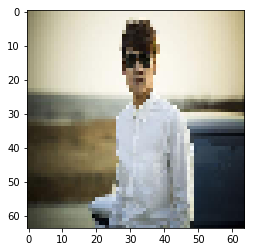

In [11]:
img_path = './image/image2.jpg'
img = image.load_img(img_path,target_size = (64,64))
imshow(img)

x = image.img_to_array(img)
x = np.expand_dims(x,axis=0)
x = preprocess_input(x)

print(happymodel.predict(x))

In [12]:
happymodel.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 64, 64, 3)         0         
_________________________________________________________________
zero_padding2d_3 (ZeroPaddin (None, 70, 70, 3)         0         
_________________________________________________________________
conv0 (Conv2D)               (None, 64, 64, 32)        4736      
_________________________________________________________________
bn0 (BatchNormalization)     (None, 64, 64, 32)        128       
_________________________________________________________________
activation_3 (Activation)    (None, 64, 64, 32)        0         
_________________________________________________________________
max_pool (MaxPooling2D)      (None, 32, 32, 32)        0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 32768)             0         
__________

In [13]:
happymodel.save('happymodel.h5')
#from keras.models import load_model
# happymodel = load_model('happymodel.h5')